**1. Plot of the liquid level.**



Assignment 01 **(b5_tha2)** Output Part 1


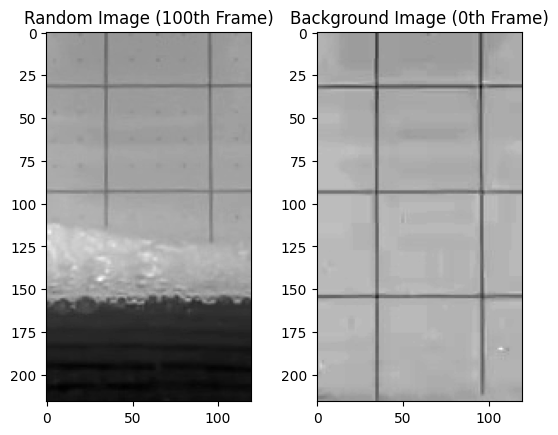

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Importing Demo Images
img_r = cv2.imread('/content/sample_data/images/liquid_frame100.jpg', 0)
img_b = cv2.imread('/content/sample_data/images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()


In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')


Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Total Area: 25920
Percentage: 26.3 %


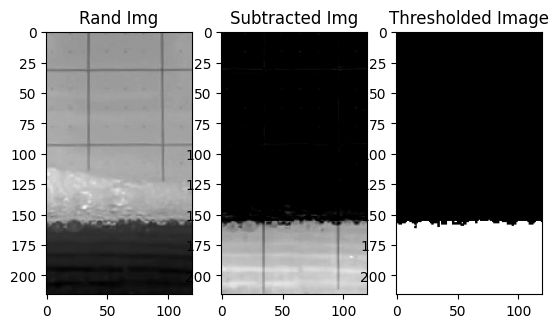

In [ ]:
# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

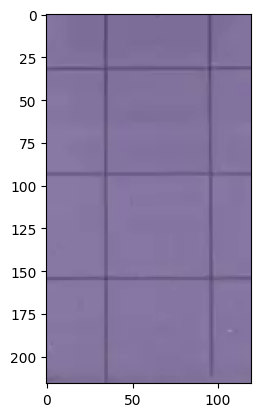

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('/content/sample_data/images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()


Assignment 01 **(b5_tha2)** Output Part 2


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# File paths for the video and background image
video_file = '/content/sample_data/images/liquidVideo.mp4'
background_image_file = '/content/sample_data/images/liquid_frame000.jpg'

# Load the background image in grayscale
background_image = cv2.imread(background_image_file, cv2.IMREAD_GRAYSCALE)
if background_image is None:
    raise FileNotFoundError(f"Could not locate the background image: {background_image_file}")

# Open the video file for processing
video_capture = cv2.VideoCapture(video_file)
if not video_capture.isOpened():
    raise FileNotFoundError(f"Unable to open video file: {video_file}")

# Lists to hold frame indices and computed liquid percentages
frames = []
liquid_levels = []

# Loop through the frames in the video
frame_count = 0
while frame_count < 240:  # Limit processing to the first 240 frames
    ret, frame = video_capture.read()
    if not ret:
        print("Video ended or encountered an error reading a frame.")
        break

    # Convert the current frame to grayscale
    current_frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the difference between the background and the current frame
    frame_difference = cv2.subtract(background_image, current_frame_gray)

    # Apply thresholding with Otsu's method
    _, thresholded_frame = cv2.threshold(frame_difference, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Identify contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Calculate the total area of the image
    height, width = thresholded_frame.shape
    image_area = height * width

    # Calculate the percentage of the largest contour relative to the total image area
    if contours:
        max_contour_area = cv2.contourArea(contours[0])
        level_percentage = round((max_contour_area / image_area) * 100, 1)
    else:
        max_contour_area = 0
        level_percentage = 0.0

    # Append the frame index and liquid level percentage to the respective lists
    frames.append(frame_count + 1)
    liquid_levels.append(level_percentage)

    # Log details for the current frame
    print(f"Frame {frame_count + 1}:")
    print(f"  Threshold Value: {_}")
    for i, contour in enumerate(contours):
        print(f"  Contour {i} Area: {cv2.contourArea(contour)}")
    print(f"  Total Image Area: {image_area}")
    print(f"  Largest Contour Percentage: {level_percentage}%\n")

    # Increment the frame count
    frame_count += 1

# Release the video capture resource
video_capture.release()
print("Finished processing the video.")

Streaming output truncated to the last 5000 lines.
  Contour 109 Area: 0.0
  Contour 110 Area: 0.0
  Contour 111 Area: 0.0
  Contour 112 Area: 0.0
  Contour 113 Area: 0.0
  Contour 114 Area: 0.0
  Contour 115 Area: 0.0
  Contour 116 Area: 0.0
  Contour 117 Area: 0.0
  Contour 118 Area: 0.0
  Contour 119 Area: 0.0
  Contour 120 Area: 0.0
  Contour 121 Area: 0.0
  Contour 122 Area: 0.0
  Contour 123 Area: 0.0
  Contour 124 Area: 0.0
  Contour 125 Area: 0.0
  Contour 126 Area: 0.0
  Contour 127 Area: 0.0
  Contour 128 Area: 0.0
  Total Image Area: 25920
  Largest Contour Percentage: 2.4%

Frame 43:
  Threshold Value: [[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 29  12  14  -1]
  [ 15  -1  -1  13]
  [ 16  14  -1  13]
  [ 17  15  -1  13]
  [ 18  16  -1  13]
  [ 19  17  -1  13

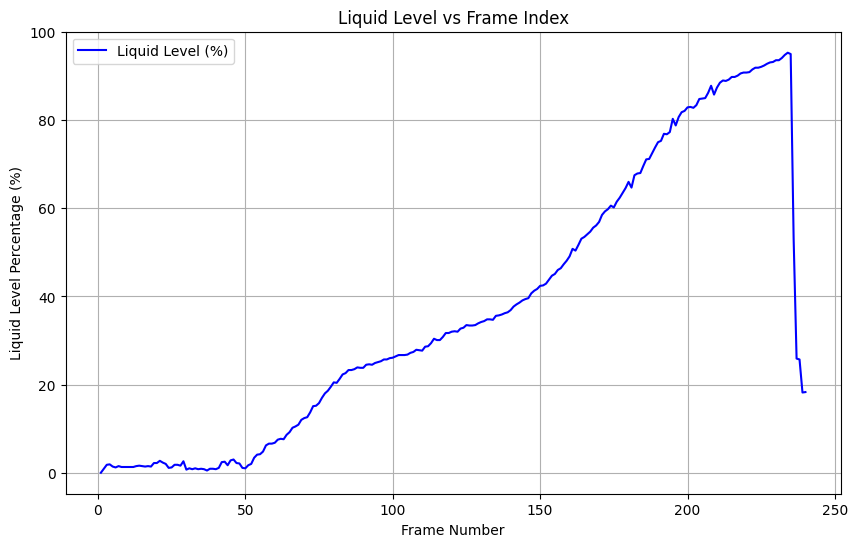

In [ ]:
# Generate a plot to visualize liquid level percentages
plt.figure(figsize=(10, 6))
plt.plot(frames, liquid_levels, color='blue', label='Liquid Level (%)')
plt.xlabel("Frame Number")
plt.ylabel("Liquid Level Percentage (%)")
plt.title("Liquid Level vs Frame Index")
plt.legend()
plt.grid(True)
plt.show()

**2. A brief note on what the student understood by reading the section on Otsu's threholding method.**


After reading the section on Otsu's thresholding method from the OpenCV documentation, the student would understand that Otsu’s method is a technique used for automatic image thresholding, which is particularly useful for converting grayscale images into binary images. The main objective of the method is to find an optimal threshold value that separates the foreground (objects of interest) from the background, based on pixel intensity levels.

The process works by analyzing the image’s histogram and iterating through all possible threshold values (0-255 for an 8-bit image). For each threshold, the method calculates the class probabilities, means, and intra-class variances. The threshold that minimizes the intra-class variance or maximizes the inter-class variance (the difference between foreground and background) is selected. This optimal threshold is then applied to convert the image into a binary form, where pixels above the threshold are set to one value (e.g., white), and those below are set to another value (e.g., black).

The method is particularly useful in applications like object detection, edge detection, and segmentation, where it’s crucial to distinguish between different regions of the image based on pixel intensity.

**Advantages of Otsu's Method**

Automation: It eliminates the need for manual threshold selection, making it suitable for real-time and large-scale applications.

Simplicity: The algorithm is computationally straightforward and can be implemented efficiently.

Effectiveness for Bimodal Histograms: It works exceptionally well when the intensity distributions of foreground and background are distinct.

**Limitations**

  Sensitivity to Noise: Otsu's method may fail for noisy images, as noise can distort the histogram and lead to inaccurate threshold selection.

  Lighting Variations: Non-uniform lighting can result in overlapping intensity distributions, making it difficult to separate foreground and background effectively.

 Non-Bimodal Histograms: If the histogram is unimodal or has multiple overlapping peaks, the method may not produce meaningful segmentation.

**Applications**

Otsu's thresholding is commonly used in tasks such as:

  Medical imaging (e.g., detecting tumors or segmenting organs).

  Industrial vision systems (e.g., monitoring liquid levels or detecting defects).

  Document processing (e.g., converting scanned text to binary images for OCR).



**3. Two examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.**

In Frame 238, bright reflections and uneven lighting near the upper part of the container caused Otsu's method to misclassify certain non-liquid regions as part of the liquid. This segmentation error highlights the impact of lighting artifacts on the accuracy of liquid level detection.

In Frame 239, surface ripples combined with the textured bottom of the container introduced additional intensity variations. These variations led to an overestimation of the liquid level, showcasing the sensitivity of Otsu’s method to noise and irregular patterns within the liquid region.
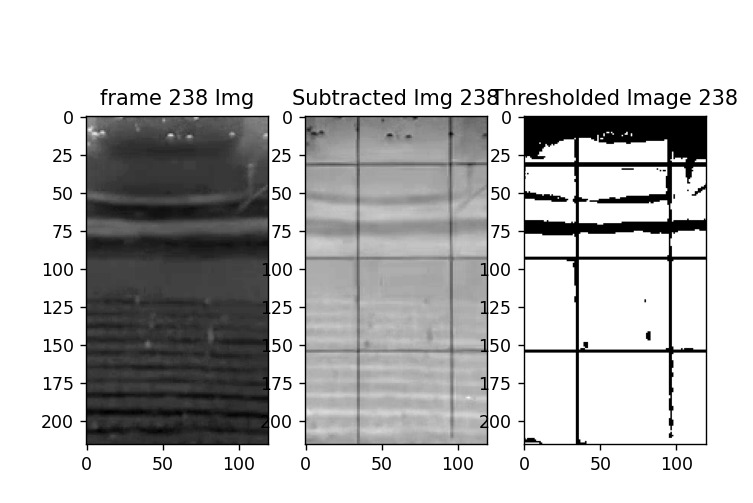


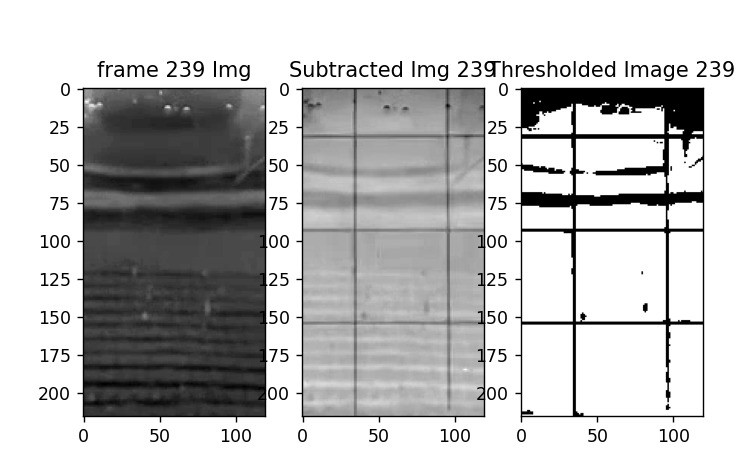


**4. A brief description on the final algorithm developed by the student.**

The final algorithm accurately detects liquid levels by combining preprocessing, background subtraction, and enhanced thresholding techniques to overcome Otsu’s method limitations.


    Preprocessing: Converts images to grayscale, reduces noise with filters, and applies contrast enhancement.

    Background Subtraction: Captures a reference background and subtracts it from the current frame to highlight the liquid region.

    Thresholding: Applies Otsu’s method to segment the liquid from the background, producing a binary image.

    Post-Processing: Uses morphological operations to refine segmentation and contour detection to identify the liquid region.

    Liquid Level Calculation: Determines the liquid height from the segmented image and converts it to physical units using a calibration factor.

    Error Handling: Flags unreliable results and optionally applies adaptive techniques for robustness.

This algorithm improves accuracy by addressing noise and intensity overlap issues through preprocessing and post-processing steps. While Otsu’s method forms the core of the algorithm, the integration of additional steps ensures reliable liquid level detection under varying conditions.